In [13]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from sklearn.mixture import GaussianMixture

In [14]:
def Linear(Start, End):
    return random.random() * (End-Start) + Start

def LinearData(DataSize, Start, End):
    x = []
    for i in range(DataSize):
      x.append(Linear(Start, End))
    return x

In [15]:
def Normal(M, D):
    n = 12
    x = 0
    for i in range (n):
      x = x + random.random()
    return D * (12/n)**(1/2) * (x - n/2) + M

def NormalData(DataSize, M, D):
    x = []
    for i in range(DataSize):
      x.append(Normal(M, D))
    return x

In [16]:
def TwoPeaksData(N, m1, d1, m2, d2):
    x = []
    for i in range(N):
        r = random.random()
        if r > 0.5:
          x.append(Normal(m1,d1))
        else:
          x.append(Normal(m2,d2))
    return x

In [17]:
def gauss_kernel(r):
     return ((2 * math.pi) ** (-1 / 2)) * np.exp(-1 / 2 * (r ** 2))

def ParzenRosenblatt(x, data, h):
    p = 0
    for i in data:
        p = p + gauss_kernel((x - i)/h)/ (len(data)*h)
    return p

Восстановление плотности линейного распределения с параметрами Start = 0, End = 1


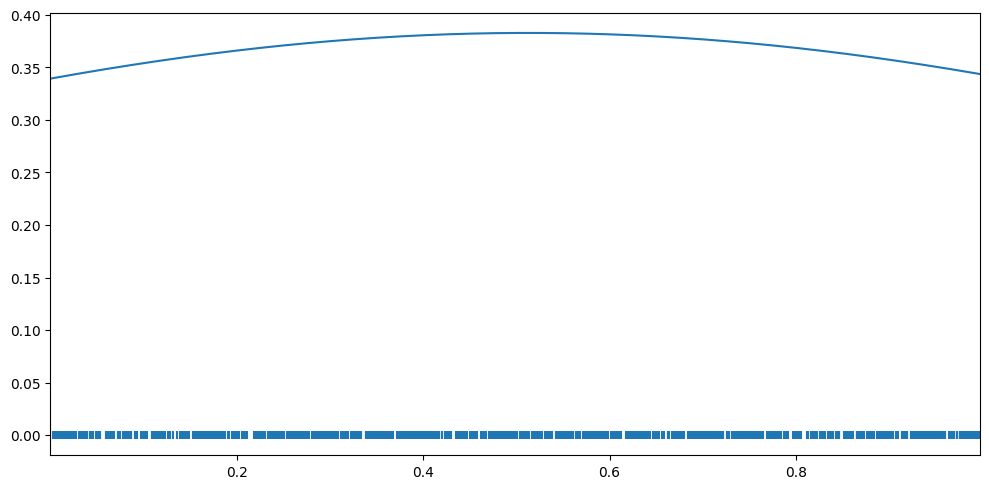

Восстановление плотности нормального распределения с параметрами M = 0, D = 1


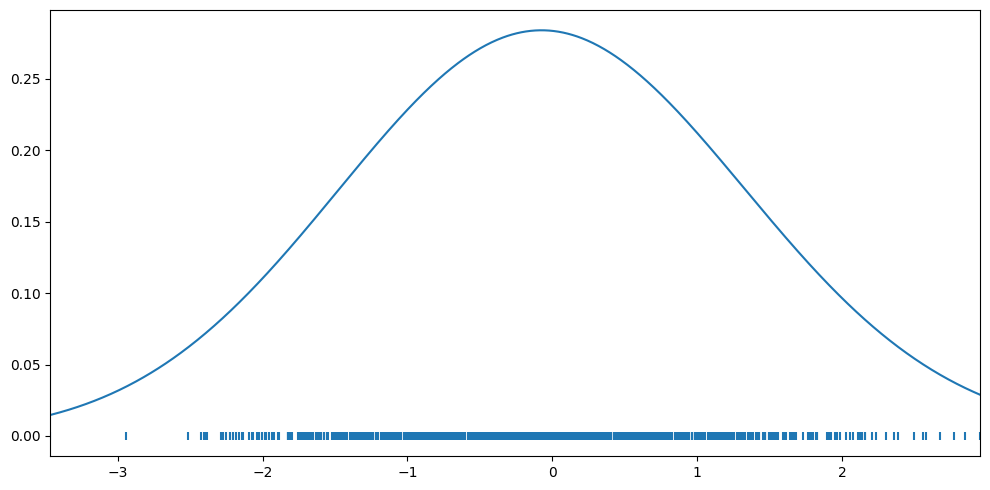

Восстановление плотности распределения "три горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


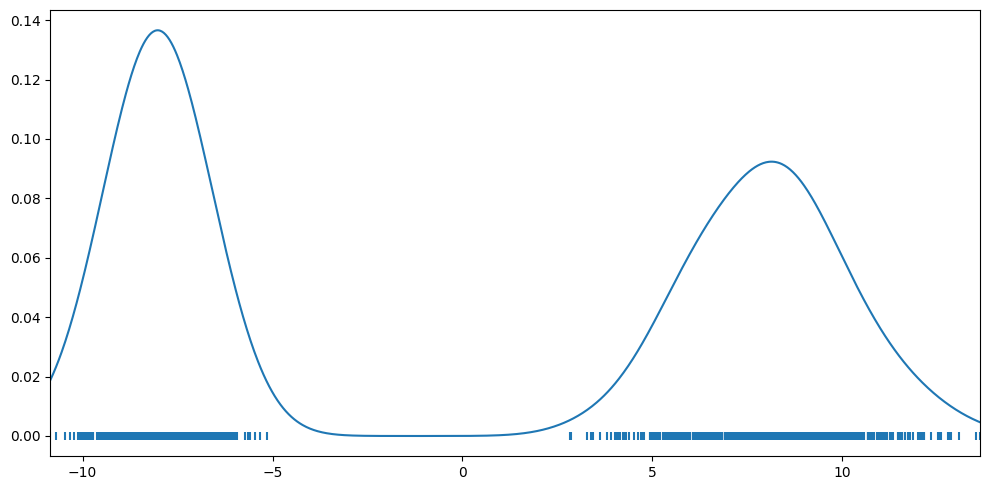

In [28]:
DataSize = 1000

def Plot(DataSize, data):
  plt_min = min(data)
  plt_max = max(data)
  x = np.linspace(plt_min, plt_max, DataSize)
  Points = np.zeros((DataSize))
  # Создание графика
  fig, ax = plt.subplots(figsize=(10,5))
  ax.plot(x, ParzenRosenblatt(x, data, h=1))
  ax.scatter(data, Points, marker = "|")
  # Оформление
  ax.set_xlim((plt_min, plt_max))
  plt.tight_layout()
  # Вывод графика на экран
  plt.show()

# Изобразим график 1
Start = 0
End = 1
lin_dat = LinearData(DataSize, Start, End)
print(f'Восстановление плотности линейного распределения с параметрами Start = {Start}, End = {End}')
Plot(DataSize, lin_dat)
# Изобразим график 2
M=0
D=1
nor_dat = NormalData(DataSize, M, D)
print(f'Восстановление плотности нормального распределения с параметрами M = {M}, D = {D}')
Plot(DataSize, nor_dat)
# Изобразим график 3
M1=-8
D1=1
M2=8
D2=2
tp_dat = TwoPeaksData(DataSize, M1, D1, M2, D2)
print(f'Восстановление плотности распределения "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
Plot(DataSize, tp_dat)

In [19]:
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzenRosenblatt(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h
print(f"LOO при стартовом значении: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении: 3684.0261606000267


Восстановление плотности распределения "три горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


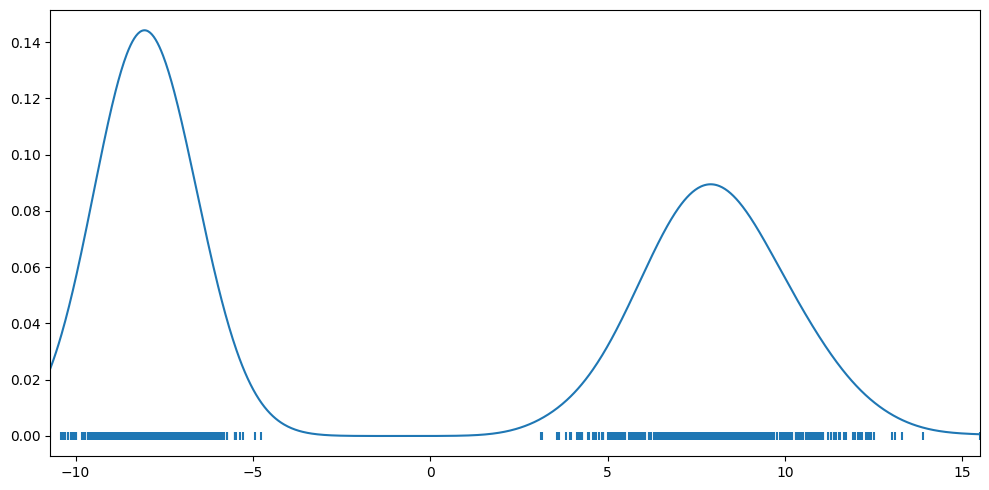

In [22]:
print(f'Восстановление плотности распределения "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
Plot(DataSize, tp_dat)

In [23]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 492.6837024286688


Восстановление плотности распределения "два горба" с параметрами M1 = -8, D1 = 1, M2 = 8, D2 = 2


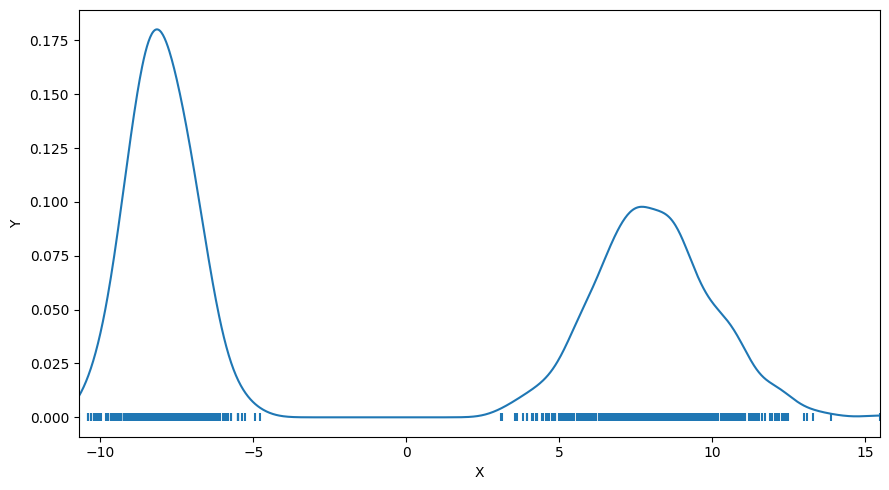

In [24]:
fig, ax = plt.subplots(figsize=(9,5))
plt_min = min(tp_dat)
plt_max = max(tp_dat)
x = np.linspace(plt_min, plt_max, DataSize)
ax.plot(x, ParzenRosenblatt(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((plt_min, plt_max))

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
print(f'Восстановление плотности распределения "два горба" с параметрами M1 = {M1}, D1 = {D1}, M2 = {M2}, D2 = {D2}')
plt.show()

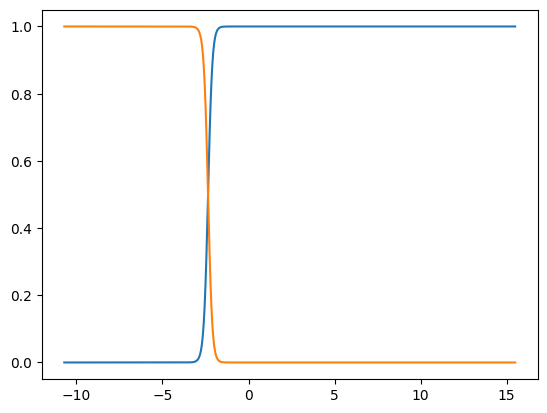

In [27]:
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()